In [2]:
%config IPCompleter.greedy=True

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import json
import glob

In [3]:
def load_data(path):
    with open(path) as f:
        data = json.load(f)
        return data
    
def load_data_from_dir(path):
    files = glob.glob(path)
    data_preproc_torch = { 'epoch': [], 'reward': [], 'workers': [] }
    for file in files:
        tmp_data = load_data(file)
        for i in range(len(tmp_data['epoch'])):
            data_preproc_torch['epoch'].append(tmp_data['epoch'][i])
            data_preproc_torch['reward'].append(tmp_data['mean_reward'][i])
        data_preproc_torch['workers'].extend([tmp_data['workers']] * len(tmp_data['epoch']))
    df = pd.DataFrame(data=data_preproc_torch)
    df_wide = df.pivot('epoch', 'workers', 'reward')
    return df_wide

In [4]:
results_wide_torch = load_data_from_dir('../results/torch/Run2/*.json')
results_wide_tf = load_data_from_dir('../results/tf/*.json')
results_wide_ray = load_data_from_dir('../results/ray/*.json')

In [5]:
def plot_worker_reward(dataframe, path):
    ax = sns.lineplot(data=dataframe)
    ax.legend(title='Workers')
    ax.set(xlabel='Epochs', ylabel='Average Reward')
    plt.tight_layout()
    plt.show()
    ax.get_figure().savefig(path, dpi=400)

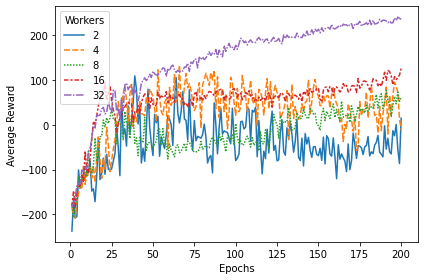

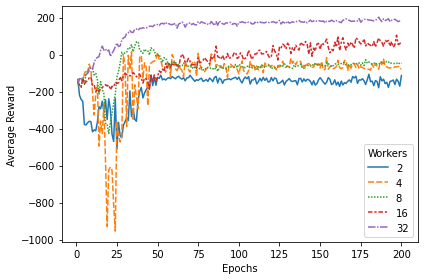

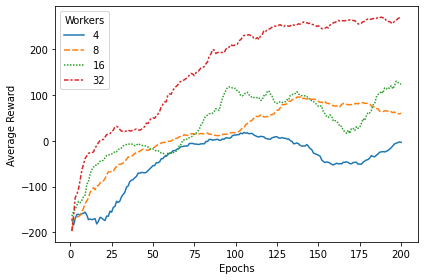

In [6]:
plot_worker_reward(results_wide_torch, 'torch_worker_results.png')
plot_worker_reward(results_wide_tf, 'tf_worker_results.png')
plot_worker_reward(results_wide_ray, 'ray_worker_results.png')